In [1]:
!gdown --id 1cfke6ixTKRHUyCAktPbRd3saaXTjEnhe
!gdown --id 1NZoecSkYG-ZEGrDbmsRV50EyZb8Wv6En

Downloading...
From: https://drive.google.com/uc?id=1cfke6ixTKRHUyCAktPbRd3saaXTjEnhe
To: /content/noise.jpg
100% 444k/444k [00:00<00:00, 60.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NZoecSkYG-ZEGrDbmsRV50EyZb8Wv6En
To: /content/shape.jpg
100% 40.4k/40.4k [00:00<00:00, 32.2MB/s]


In [2]:
import time
from functools import wraps

def calc_time(f):
  @wraps(f)
  def wrapper(*args, **kwds):
    start = time.time()
    result = f(*args, **kwds)
    elapsed = time.time() - start
    print("%s took %ds" % (f.__name__, elapsed))
    return result
  return wrapper

In [3]:
import cv2
import numpy as np


class Convolution:
    def __init__(self):
        return None

    @calc_time
    def correlation(self, image, kernel):
        h_image, w_image = image.shape
        h_kernel, w_kernel = kernel.shape
        h, w = h_image - h_kernel + 1, w_image - w_kernel + 1

        I = image.copy()
        return np.array([[I[i:i + w_kernel,j:j + h_kernel].ravel() @ kernel.ravel() for j in range(w)] for i in range(h)])

    @calc_time
    def convolution(self, image, kernel):
        return self.correlation(image, np.rot90(np.rot90(kernel))) 

### Test on matrix

In [4]:
kernel = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
image = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])

conv = Convolution()
print('Correlation')
print(conv.correlation(image, kernel))
print('Convolution')
print(conv.convolution(image, kernel))

Correlation
correlation took 0s
[[8]]
Convolution
correlation took 0s
convolution took 0s
[[-8]]


### Test reduce noise on image

correlation took 2s
convolution took 2s
OpenCV took 0.0012311935424804688s


Text(0.5, 1.0, 'GaussianBlur openCV')

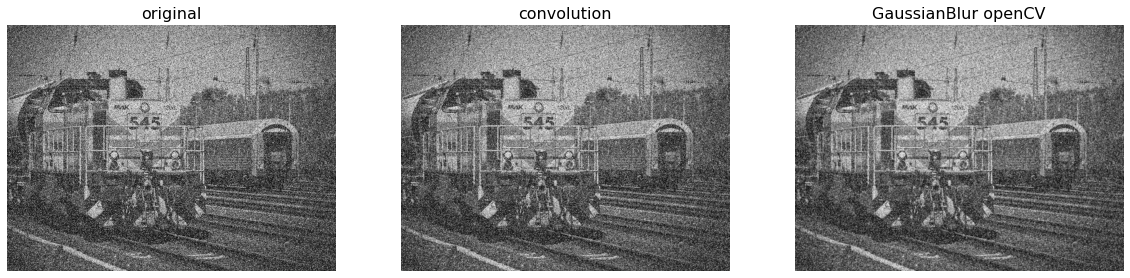

In [5]:
import matplotlib.pyplot as plt


# Kernel Gaussian 3x3
kernel = np.array([[0.0113, 0.0838, 0.0113], 
                    [0.0838, 0.6193, 0.0838],
                    [0.0113, 0.0838, 0.0113]])

image = cv2.imread('noise.jpg', 0)
# new_image_cor = conv.correlation(image, kernel)
new_image = conv.convolution(image, kernel)


# Gauss openCV
t1 = time.time()
gauss = cv2.GaussianBlur(image, (3, 3), 0)
t2 = time.time()
print(f'OpenCV took {t2 - t1}s')

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(image, cmap="gray")
ax[0].axis("off")
ax[0].set_title("original", fontsize=16)

ax[1].imshow(new_image, cmap="gray")
ax[1].axis("off")
ax[1].set_title("convolution", fontsize=16)

ax[2].imshow(gauss, cmap="gray")
ax[2].axis("off")
ax[2].set_title("GaussianBlur openCV", fontsize=16)

### Test egde detection

In [6]:
image = cv2.imread('shape.jpg', 0)

# Implement
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

conv = Convolution()
new_image_x = conv.convolution(image, sobel_x)
new_image_y = conv.convolution(image, sobel_y)

# OpenCV Function
t1 = time.time()
cv_new_image_x = cv2.filter2D(image, -1, sobel_x)
t2 = time.time()
print('OpenCV took {}s'.format(t2 - t1))
cv_new_image_y = cv2.filter2D(image, -1, sobel_y)

correlation took 6s
convolution took 6s
correlation took 6s
convolution took 6s
OpenCV took 0.0026035308837890625s


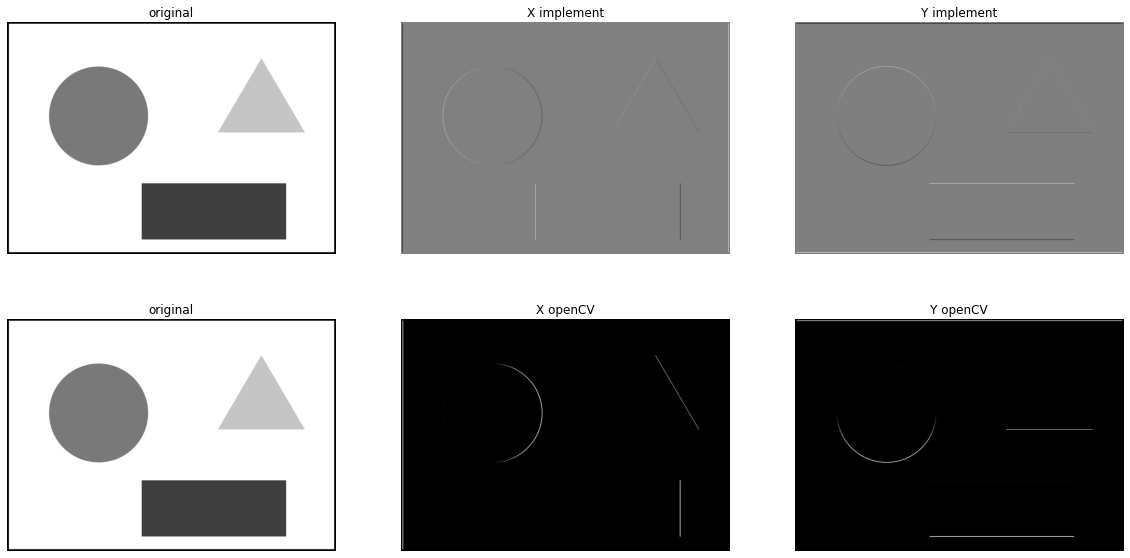

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0][0].imshow(image, cmap="gray")
ax[0][0].axis("off")
ax[0][0].set_title("original", fontsize=12)

ax[0][1].imshow(new_image_x, cmap="gray")
ax[0][1].axis("off")
ax[0][1].set_title("X implement", fontsize=12)

ax[0][2].imshow(new_image_y, cmap="gray")
ax[0][2].axis("off")
ax[0][2].set_title("Y implement", fontsize=12)

ax[1][0].imshow(image, cmap="gray")
ax[1][0].axis("off")
ax[1][0].set_title("original", fontsize=12)

ax[1][1].imshow(cv_new_image_x, cmap="gray")
ax[1][1].axis("off")
ax[1][1].set_title("X openCV", fontsize=12)

ax[1][2].imshow(cv_new_image_y, cmap="gray")
ax[1][2].axis("off")
ax[1][2].set_title("Y openCV", fontsize=12)


plt.show() 